<a href="https://colab.research.google.com/github/Edebirid/Food_hub-Assessment/blob/main/Foodhub_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv ('//content/drive/MyDrive/foodhub_order (1).csv')

In [ ]:
# Number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


In [ ]:
# Get the datatypes of each column
datatypes = df.dtypes

print("Datatypes of each column:")
for column, dtype in datatypes.items():
    print(f"{column}: {dtype}")

Datatypes of each column:
order_id: int64
customer_id: int64
restaurant_name: object
cuisine_type: object
cost_of_the_order: float64
day_of_the_week: object
rating: object
food_preparation_time: int64
delivery_time: int64


In [ ]:
# Handle missing values
# Convert "Not given" in rating to NaN
df['rating'] = df['rating'].replace('Not given', np.nan)

# Re-check missing values after converting "Not given"
print("\nMissing Values After Converting 'Not given':")
print(df.isnull().sum())

# Categorical columns: Impute with mode
categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week']
for col in categorical_columns:
    if df[col].isnull().sum() > 1:
        mode_value = df[col].mode()[1]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in {col} with mode: {mode_value}")

# Rating column: Impute with mode of non-NaN ratings
if df['rating'].isnull().sum() > 1:
    mode_rating = df['rating'].mode()[1]
    df['rating'].fillna(mode_rating, inplace=True)
    print(f"Imputed missing values in rating with mode: {mode_rating}")

# Identifier columns: Check for missing order_id or customer_id
if df['order_id'].isnull().sum() > 1 or df['customer_id'].isnull().sum() > 1:
    print("Warning: Missing values in order_id or customer_id. Dropping affected rows.")
    df = df.dropna(subset=['order_id', 'customer_id'])



Missing Values After Converting 'Not given':
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [ ]:
# Summary for numeric columns
print("Statistical Summary of Numeric Columns:")
P = df.describe()
print(P)
# Summary for numeric columns
print("Statistical Summary of Numeric Columns:")
P = df.describe()
print(P)

# min, mean, and max for food_preparation_time
prep_time_stats = df['food_preparation_time'].agg(['min', 'mean', 'max'])

# Print specific statistics for food_preparation_time
print("\nFood Preparation Time Statistics (in minutes):")
print(f"Minimum: {prep_time_stats['min']:.2f}")
print(f"Average (Mean): {prep_time_stats['mean']:.2f}")
print(f"Maximum: {prep_time_stats['max']:.2f}")
print("\nFood Preparation Time Statistics (in minutes):")
print(f"Average (Mean): {prep_time_stats['mean']:.2f}")

Statistical Summary of Numeric Columns:
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
Statistical Summary of Numeric C

In [ ]:
# Count the number of orders with "Not given" in the rating column
not_rated_count = (df['rating'] == 'Not given').sum()

# Print the result
print(f"Number of orders not rated (rated as 'Not given'): {not_rated_count}")

Number of orders not rated (rated as 'Not given'): 0


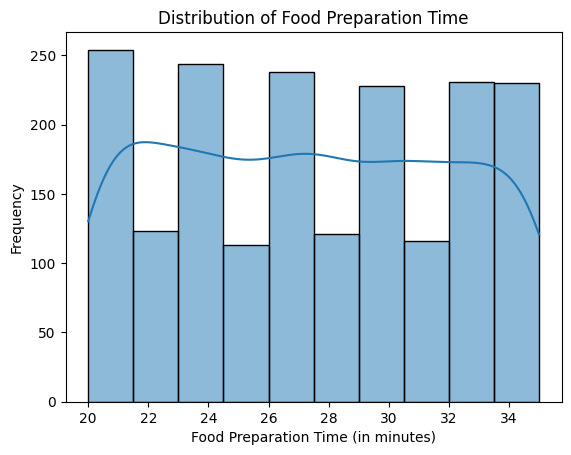

In [ ]:
# Histogram
sns.histplot(df['food_preparation_time'], bins=10, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (in minutes)')
plt.ylabel('Frequency')
plt.show()

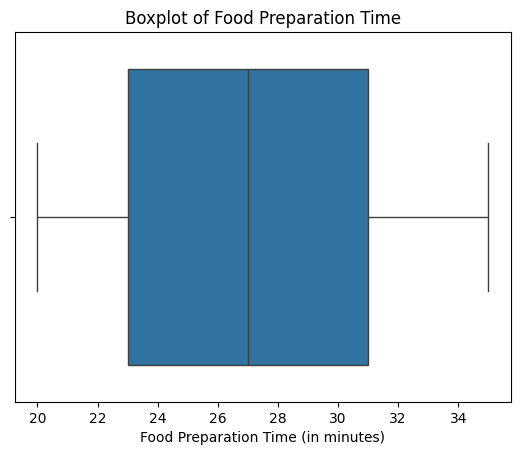

In [ ]:
# Boxplot
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (in minutes)')
plt.show()

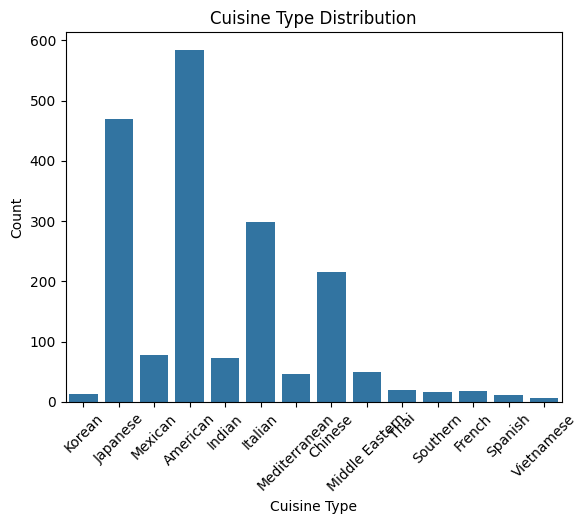

In [ ]:
# Countplot
sns.countplot(x=df['cuisine_type'])
plt.title('Cuisine Type Distribution')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Number of orders per restaurant
restaurant_counts = df['restaurant_name'].value_counts()

# Top 5 restaurants
top_5_restaurants = restaurant_counts.head(5)

print("Top 5 Restaurants by Number of Orders:")
for restaurant, count in top_5_restaurants.items():
    print(f"{restaurant}: {count} orders")
top_5_restaurants = restaurant_counts.head(5)


Top 5 Restaurants by Number of Orders:
Shake Shack: 219 orders
The Meatball Shop: 132 orders
Blue Ribbon Sushi: 119 orders
Blue Ribbon Fried Chicken: 96 orders
Parm: 68 orders


In [ ]:
# Weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Number of orders per cuisine type on weekends
cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# Most popular cuisine
most_popular_count = cuisine_counts.max()

# Print the result
print(f"Most popular cuisine on weekends is: {most_popular_cuisine}")
print(f"Number of orders: {most_popular_count}")

Most popular cuisine on weekends is: American
Number of orders: 415


In [ ]:
# Costing more than 20 dollars
orders_over_20 = len(df[df['cost_of_the_order'] > 20])

# Calculate the percentage
percentage_over_20 = (orders_over_20 / total_orders) * 100

# Print the result
print(f"Percentage of orders costing more than 20 dollars: {percentage_over_20:.2f}%")
print(f"Number of orders over 20 dollars: {orders_over_20}")

Percentage of orders costing more than 20 dollars: 29.24%
Number of orders over 20 dollars: 555


In [ ]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


In [ ]:
# Count the number of orders per customer
customer_counts = df['customer_id'].value_counts()

# Top 3 customers
top_3_customers = customer_counts.head(3)

print("Top 3 Most Frequent Customers (For 20% Discount Vouchers):")
for customer_id, count in top_3_customers.items():
    print(f"Customer ID: {customer_id}, Number of Orders: {count}")

Top 3 Most Frequent Customers (For 20% Discount Vouchers):
Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


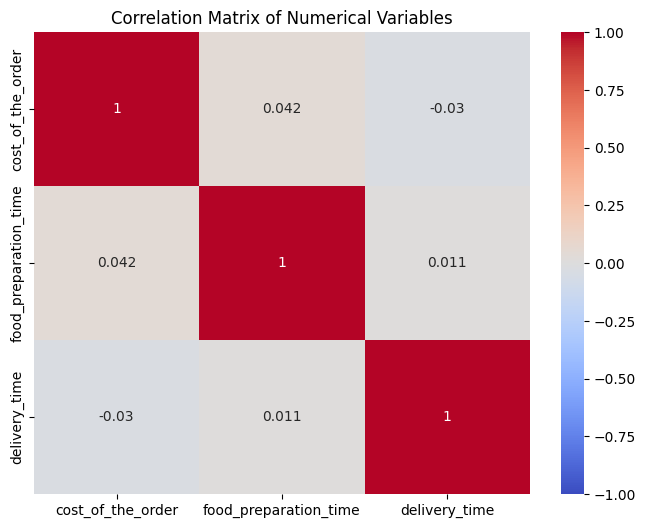

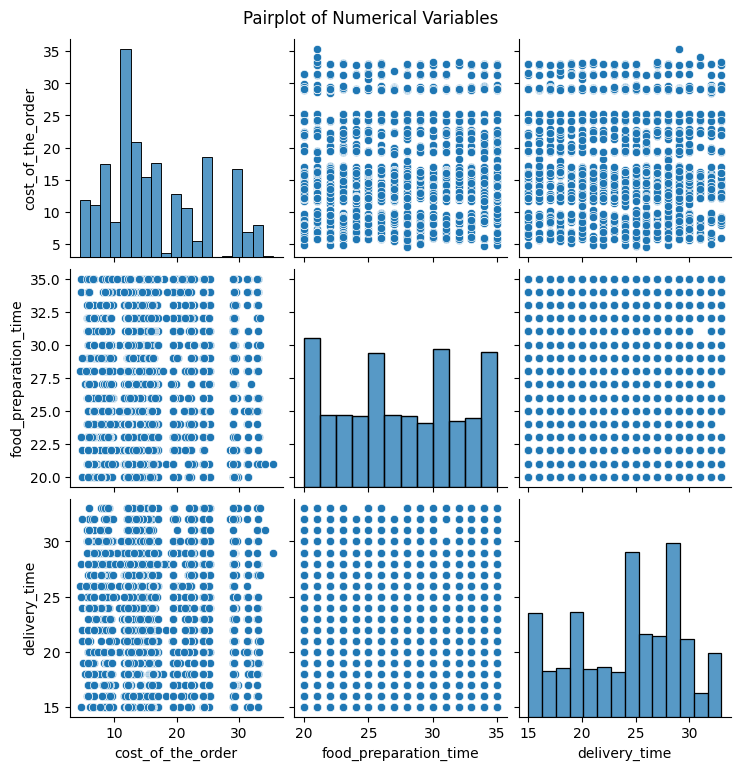

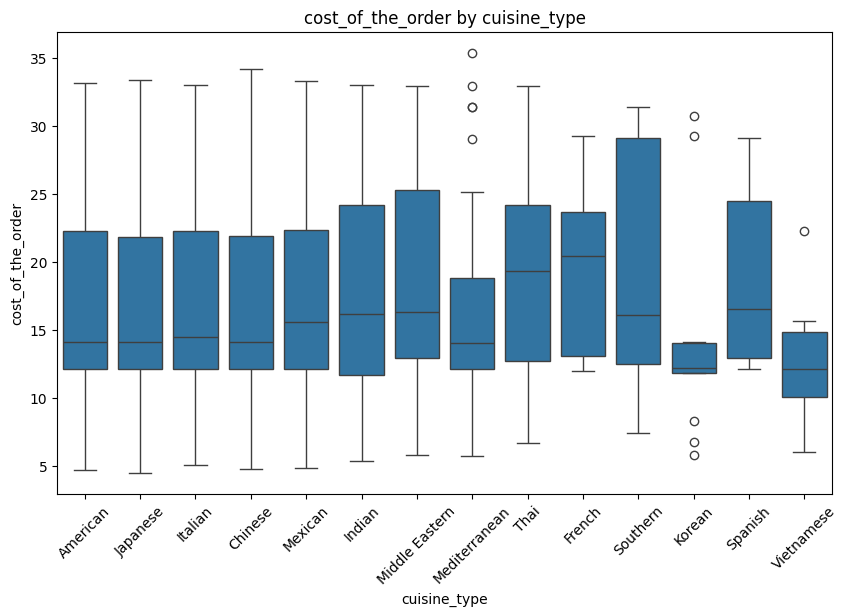

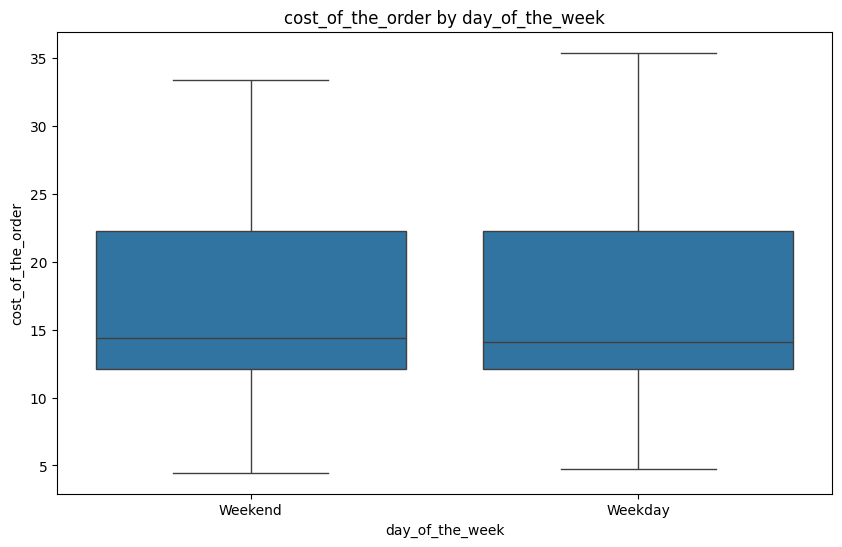

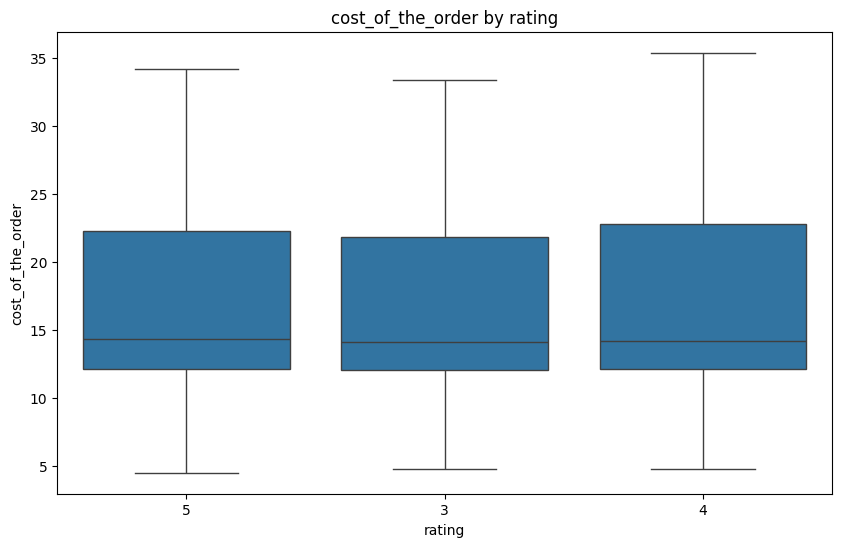

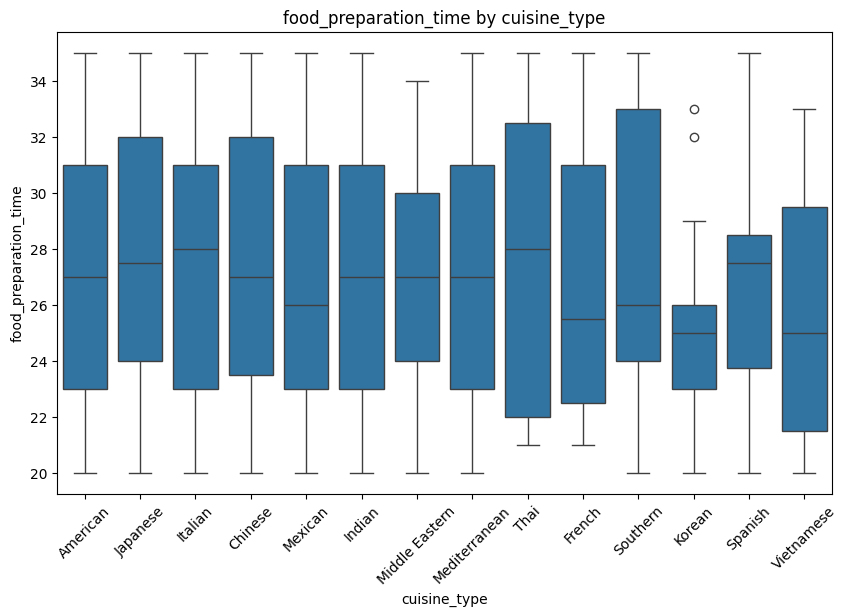

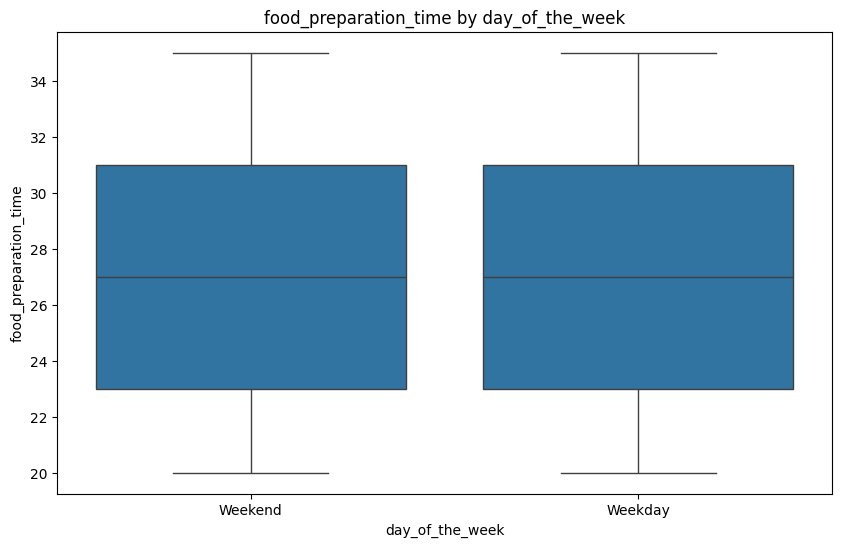

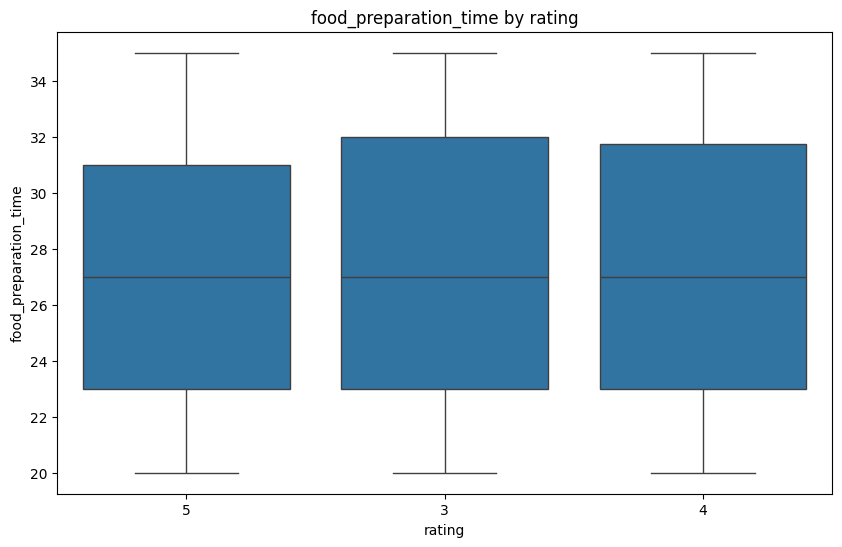

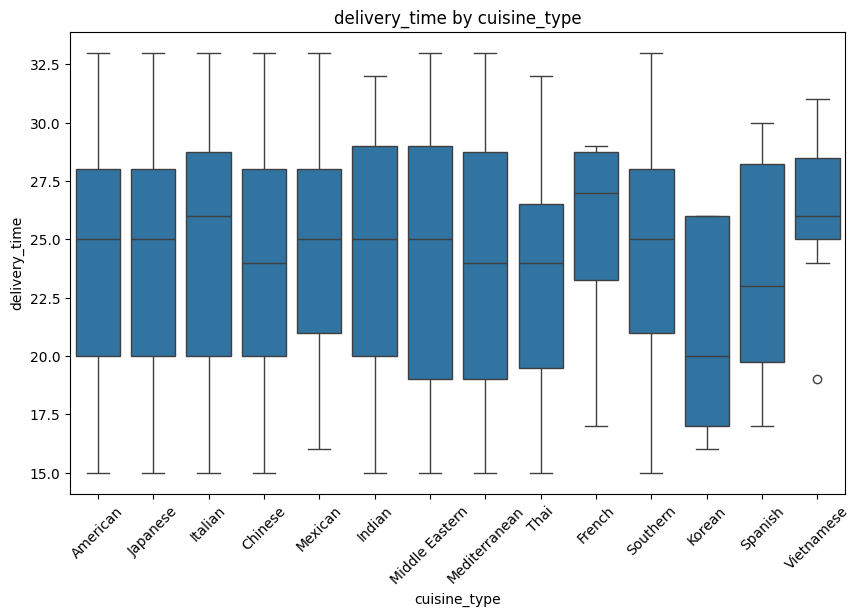

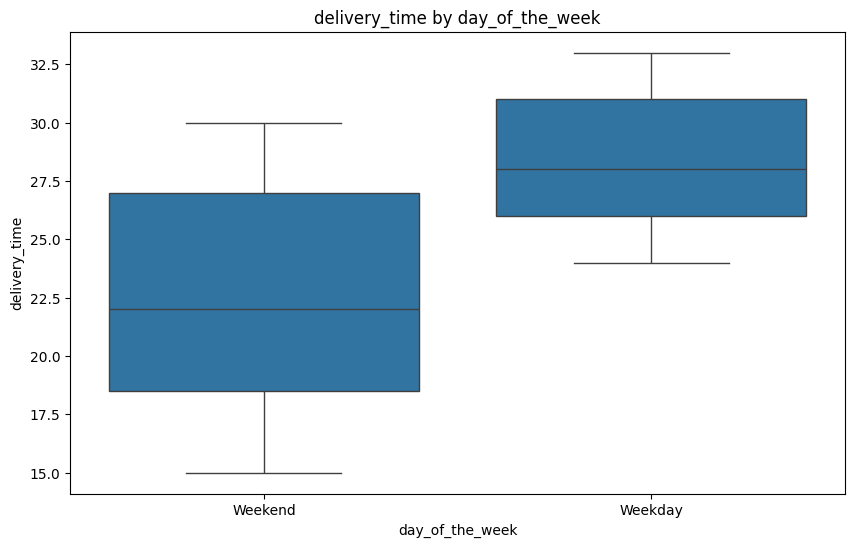

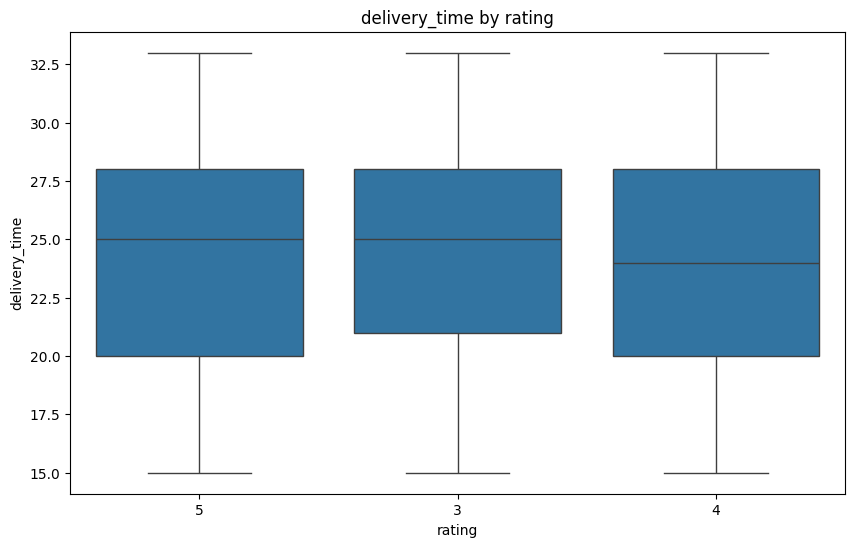

<ipython-input-74-ee6bdb8cc13f>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, order=df[cat_var].value_counts().index, ci=None)


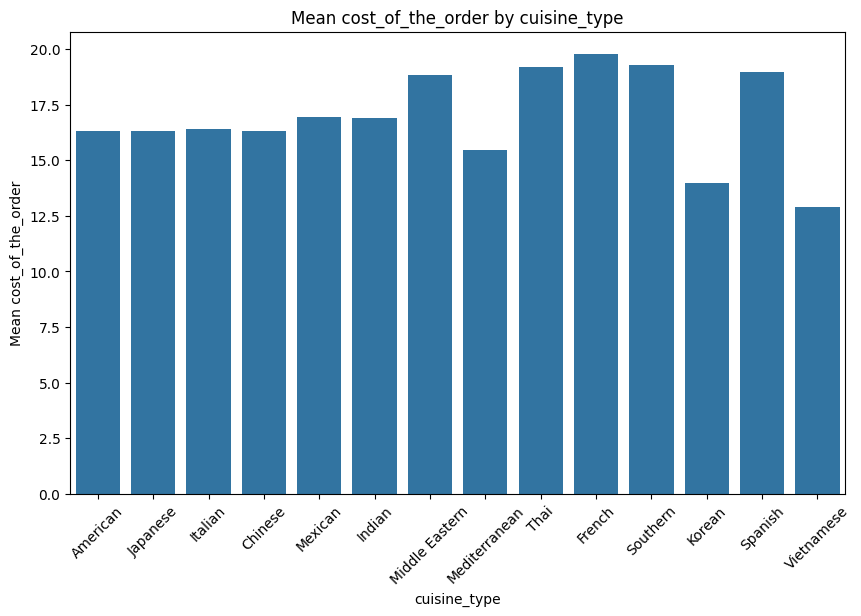

<ipython-input-74-ee6bdb8cc13f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, ci=None)


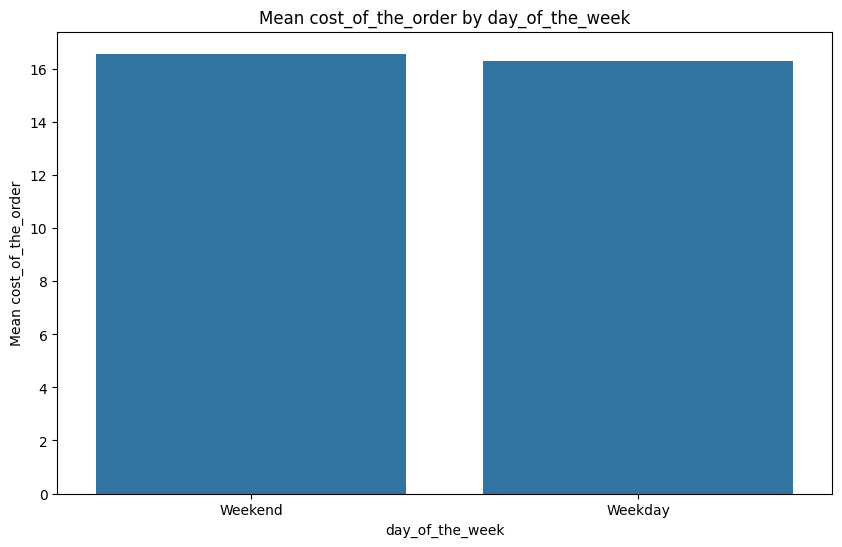

<ipython-input-74-ee6bdb8cc13f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, ci=None)


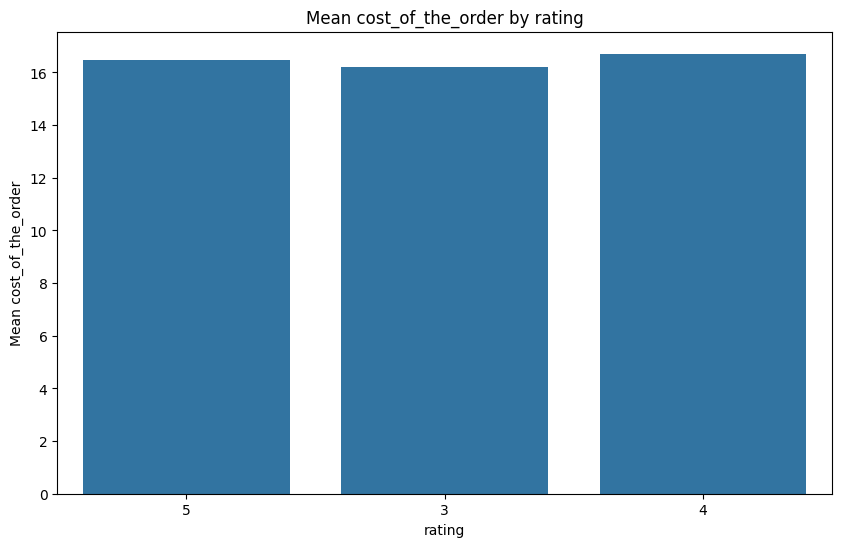

<ipython-input-74-ee6bdb8cc13f>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, order=df[cat_var].value_counts().index, ci=None)


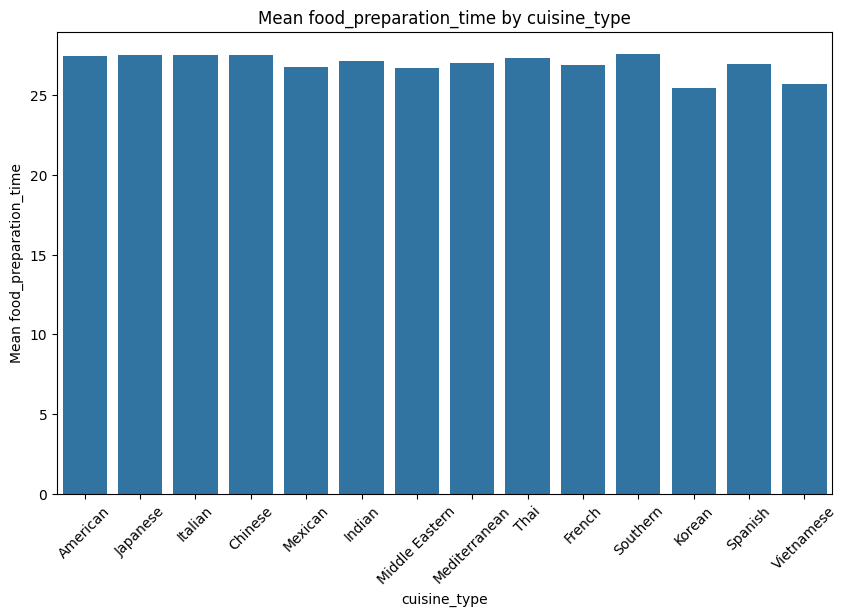

<ipython-input-74-ee6bdb8cc13f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, ci=None)


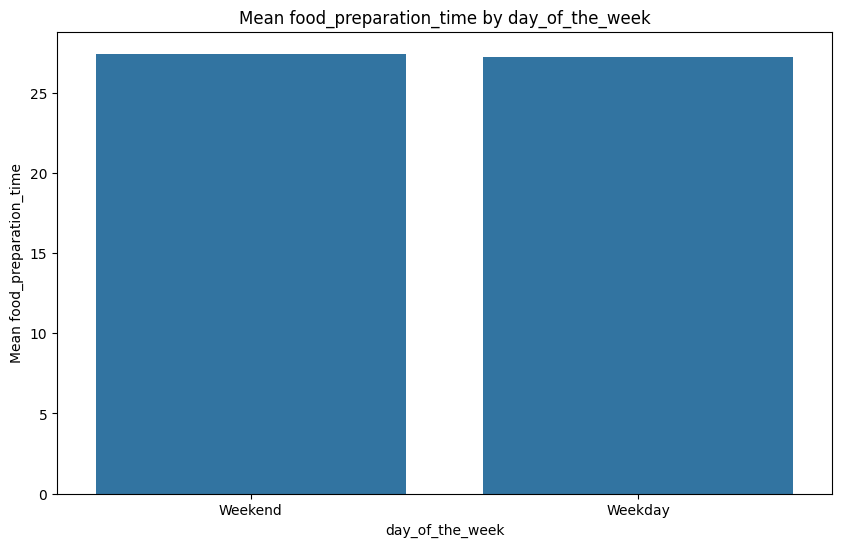

<ipython-input-74-ee6bdb8cc13f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, ci=None)


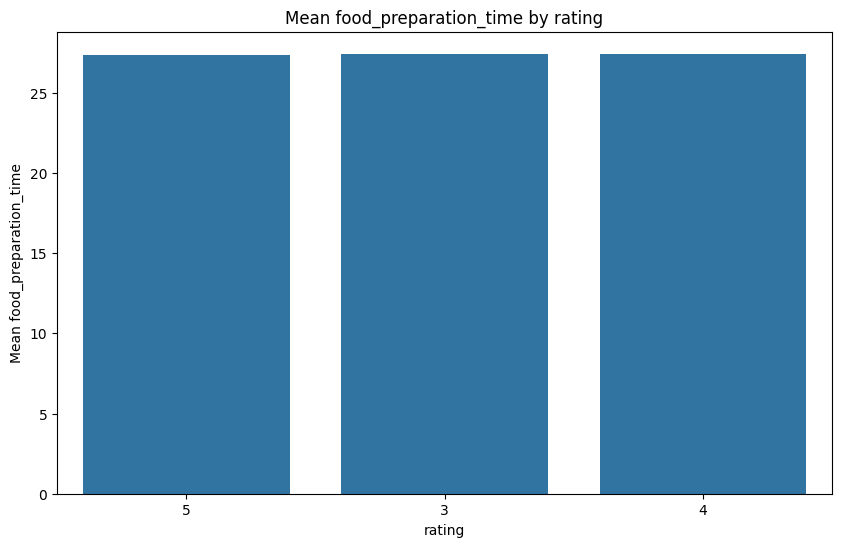

<ipython-input-74-ee6bdb8cc13f>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, order=df[cat_var].value_counts().index, ci=None)


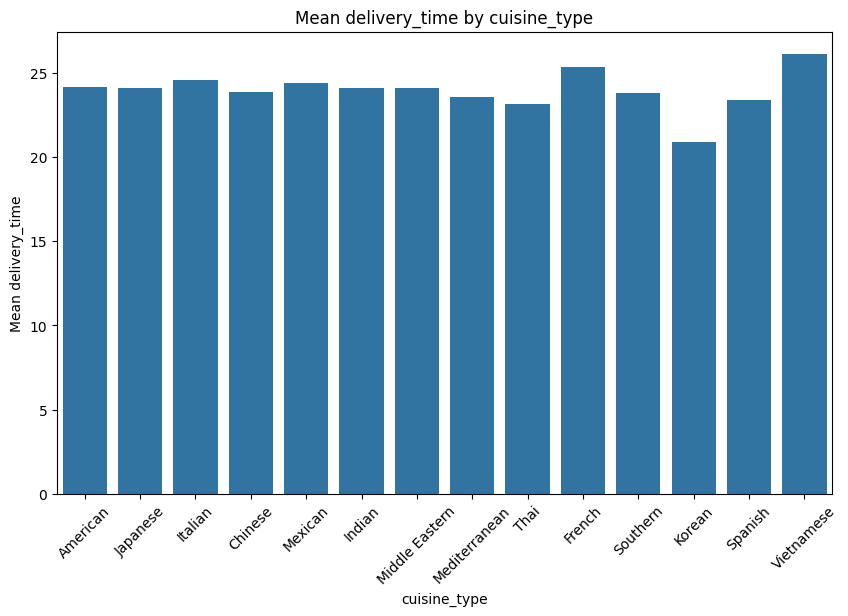

<ipython-input-74-ee6bdb8cc13f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, ci=None)


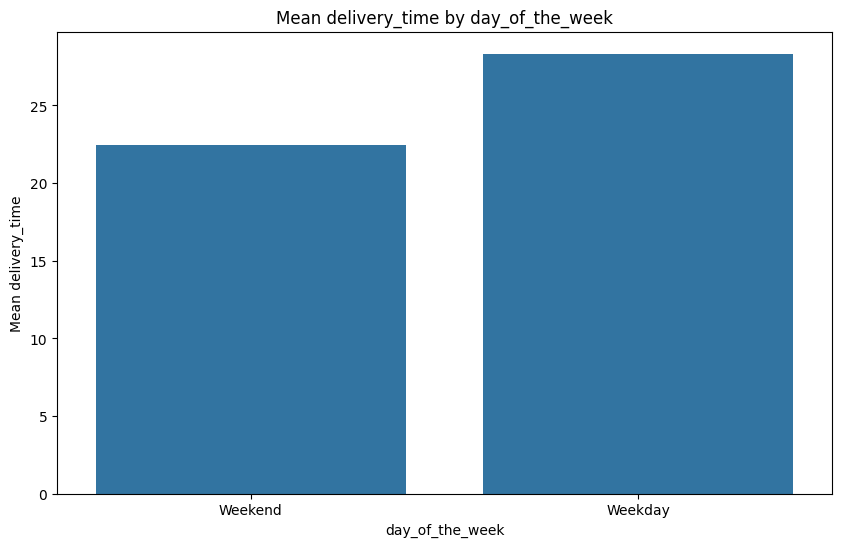

<ipython-input-74-ee6bdb8cc13f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y=num_var, data=df, ci=None)


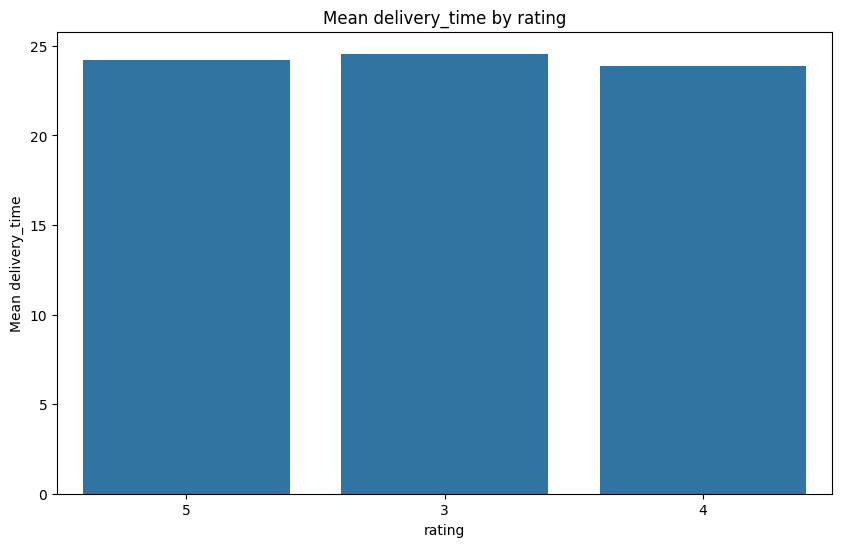

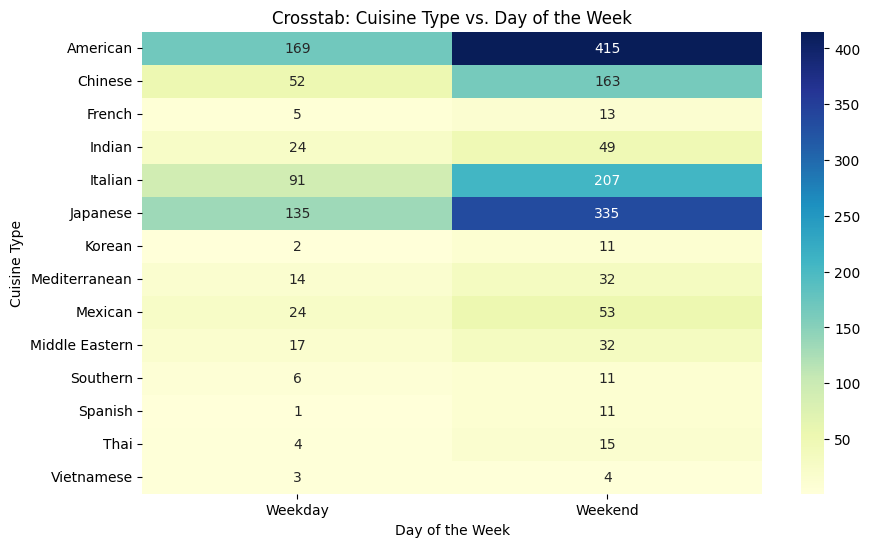

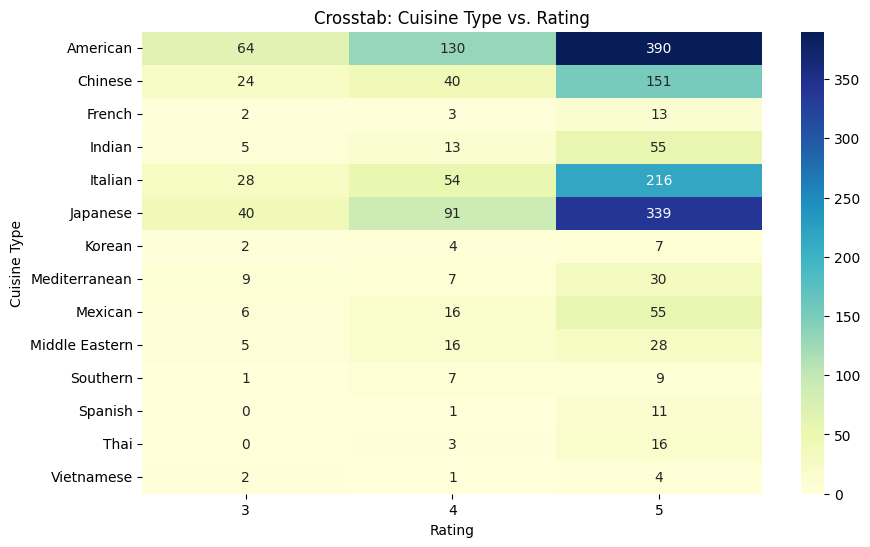


1. Numerical vs. Numerical Relationships:
Correlation Matrix:
 - cost_of_the_order vs. food_preparation_time: Correlation = 0.04
 - cost_of_the_order vs. delivery_time: Correlation = -0.03
 - food_preparation_time vs. delivery_time: Correlation = 0.01

2. Numerical vs. Categorical Relationships:

cost_of_the_order by cuisine_type:
 - American: Mean = 16.32
 - Chinese: Mean = 16.31
 - French: Mean = 19.79
 - Indian: Mean = 16.92
 - Italian: Mean = 16.42
 - Japanese: Mean = 16.30
 - Korean: Mean = 14.00
 - Mediterranean: Mean = 15.47
 - Mexican: Mean = 16.93
 - Middle Eastern: Mean = 18.82
 - Southern: Mean = 19.30
 - Spanish: Mean = 18.99
 - Thai: Mean = 19.21
 - Vietnamese: Mean = 12.88
 - Highest mean cost_of_the_order: French (19.79)

cost_of_the_order by day_of_the_week:
 - Weekday: Mean = 16.31
 - Weekend: Mean = 16.57

cost_of_the_order by rating:
 - 3: Mean = 16.22
 - 4: Mean = 16.71
 - 5: Mean = 16.48

food_preparation_time by cuisine_type:
 - American: Mean = 27.44
 - Chinese:

In [ ]:
# Numerical and categorical variables
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_vars = ['cuisine_type', 'day_of_the_week', 'rating']

# 1. Numerical vs. Numerical Relationships
# Correlation Matrix
plt.figure(figsize=(8, 6))
# Changed 'data' to 'df'
corr_matrix = df[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter Plots (Pairplot)
# Changed 'data' to 'df'
sns.pairplot(df[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# 2. Numerical vs. Categorical Relationships
# Boxplots for numerical variables by categorical variables
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 6))
        if cat_var == 'cuisine_type':
            # Rotate x-axis labels for cuisine_type due to many categories
            # Changed 'data' to 'df'
            sns.boxplot(x=cat_var, y=num_var, data=df, order=df[cat_var].value_counts().index)
            plt.xticks(rotation=45)
        else:
            # Changed 'data' to 'df'
            sns.boxplot(x=cat_var, y=num_var, data=df)
        plt.title(f'{num_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.show()

# Bar Plots for mean of numerical variables by categorical variables
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 6))
        if cat_var == 'cuisine_type':
            # Changed 'data' to 'df'
            sns.barplot(x=cat_var, y=num_var, data=df, order=df[cat_var].value_counts().index, ci=None)
            plt.xticks(rotation=45)
        else:

            sns.barplot(x=cat_var, y=num_var, data=df, ci=None)
        plt.title(f'Mean {num_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(f'Mean {num_var}')
        plt.show()

# Categorical vs. Categorical Relationships
# Crosstab Heatmap: cuisine_type vs. day_of_the_week
plt.figure(figsize=(10, 6))

crosstab_day = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])
sns.heatmap(crosstab_day, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Crosstab: Cuisine Type vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.show()

# Crosstab Heatmap: cuisine_type vs. rating
plt.figure(figsize=(10, 6))

crosstab_rating = pd.crosstab(df['cuisine_type'], df['rating'])
sns.heatmap(crosstab_rating, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Crosstab: Cuisine Type vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Cuisine Type')
plt.show()

print("\n1. Numerical vs. Numerical Relationships:")
print(f"Correlation Matrix:")
for i, var1 in enumerate(numerical_vars):
    for var2 in numerical_vars[i+1:]:
        corr = corr_matrix.loc[var1, var2]
        print(f" - {var1} vs. {var2}: Correlation = {corr:.2f}")

print("\n2. Numerical vs. Categorical Relationships:")
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        # Changed 'data' to 'df'
        means = df.groupby(cat_var)[num_var].mean()
        print(f"\n{num_var} by {cat_var}:")
        for category, mean in means.items():
            print(f" - {category}: Mean = {mean:.2f}")
        if cat_var == 'cuisine_type':
            top_cuisine = means.idxmax()
            print(f" - Highest mean {num_var}: {top_cuisine} ({means.max():.2f})")

print("\n3. Categorical vs. Categorical Relationships:")
print("\nCuisine Type vs. Day of the Week:")
top_cuisine_weekend = crosstab_day['Weekend'].idxmax()
print(f" - Most popular cuisine on Weekend: {top_cuisine_weekend} ({crosstab_day['Weekend'].max()} orders)")
top_cuisine_weekday = crosstab_day['Weekday'].idxmax()


In [ ]:
# Ratings to numeric, with "Not given" as NaN
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant to get rating count and average rating
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating_numeric', 'count'),  # Count of non-NaN ratings
    avg_rating=('rating_numeric', 'mean')      # Mean of numeric ratings
).reset_index()

# Restaurants with > 50 ratings and average rating > 4
qualifying_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['avg_rating'] > 4)
]

# Sort by rating count for better presentation
qualifying_restaurants = qualifying_restaurants.sort_values(by='rating_count', ascending=False)

print("Restaurants Qualifying for Promotional Offer (Rating Count > 50, Average Rating > 4):")
if qualifying_restaurants.empty:
    print("No restaurants meet the criteria.")
else:
    for _, row in qualifying_restaurants.iterrows():
        print(f"Restaurant: {row['restaurant_name']}, "
              f"Rating Count: {int(row['rating_count'])}, "
              f"Average Rating: {row['avg_rating']:.2f}")

Restaurants Qualifying for Promotional Offer (Rating Count > 50, Average Rating > 4):
Restaurant: Shake Shack, Rating Count: 219, Average Rating: 4.56
Restaurant: The Meatball Shop, Rating Count: 132, Average Rating: 4.69
Restaurant: Blue Ribbon Sushi, Rating Count: 119, Average Rating: 4.52
Restaurant: Blue Ribbon Fried Chicken, Rating Count: 96, Average Rating: 4.55
Restaurant: Parm, Rating Count: 68, Average Rating: 4.50
Restaurant: RedFarm Broadway, Rating Count: 59, Average Rating: 4.47
Restaurant: RedFarm Hudson, Rating Count: 55, Average Rating: 4.49


In [ ]:
# Calculate commission based on order cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission for cost > $20
    elif cost > 5:
        return cost * 0.15  # 15% commission for cost > $5
    else:
        return 0  # No commission for cost <= $5

# Apply commission calculation to each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate net revenue (sum of commissions)
net_revenue = df['commission'].sum()

# Print the result
print(f"Net revenue generated by the company: ${net_revenue:.2f}")
print(f"Total orders processed: {len(df)}")

Net revenue generated by the company: $6166.30
Total orders processed: 1898


In [ ]:
# Calculate total delivery time (preparation + delivery)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Get the total number of orders
total_orders = len(df)

# Count orders with total delivery time > 60 minutes
orders_over_60 = len(df[df['total_delivery_time'] > 60])

# Percentage
percentage_over_60 = (orders_over_60 / total_orders) * 100

# Print the result
print(f"Percentage of orders taking more than 60 minutes to deliver: {percentage_over_60:.2f}%")
print(f"Number of orders over 60 minutes: {orders_over_60}")
print(f"Total orders: {total_orders}")

Percentage of orders taking more than 60 minutes to deliver: 10.54%
Number of orders over 60 minutes: 200
Total orders: 1898


In [ ]:
# Mean delivery time by day of the week
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean Delivery Time by Day of the Week and Weekend:")
print(f"Weekday: {mean_delivery_time['Weekday']:.2f} minutes")

Mean Delivery Time by Day of the Week and Weekend:
Weekday: 28.34 minutes


In [ ]:
# Cuisines with high "Not given" ratings
not_given_by_cuisine = df[df['rating'] == 'Not given']['cuisine_type'].value_counts()
print("\n1. Cuisines with High 'Not given' Ratings (Target for Feedback Incentives):")
for cuisine, count in not_given_by_cuisine.head(3).items():
    print(f" - {cuisine}: {count} unrated orders")

# 2. French and Thai restaurants for premium promotions
premium_cuisines = df[df['cuisine_type'].isin(['French', 'Thai'])]['restaurant_name'].value_counts()
print("\n2. French and Thai Restaurants (Target for Premium Promotions):")
for restaurant, count in premium_cuisines.head(5).items():
    print(f" - {restaurant}: {count} orders")

# 3. Weekend delivery times by cuisine
weekend_data = df[df['day_of_the_week'] == 'Weekend']
mean_delivery_by_cuisine = weekend_data.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)
print("\n3. Mean Delivery Time by Cuisine on Weekends (Optimize Operations):")
for cuisine, mean in mean_delivery_by_cuisine.head(3).items():
    print(f" - {cuisine}: {mean:.2f} minutes")

# Top 10 customers for loyalty program
customer_counts = df['customer_id'].value_counts()
top_10_customers = customer_counts.head(10)
print("\n4. Top 10 Customers (Expand Loyalty Program):")
for customer_id, count in top_10_customers.items():
    print(f" - Customer ID: {customer_id}, Orders: {count}")

# American cuisine orders
american_orders = len(df[df['cuisine_type'] == 'American'])
print(f"\n5. American Cuisine Orders (Boost Promotions): {american_orders} orders")

# "3"-rated orders by cuisine
low_rated = df[df['rating'] == '3']['cuisine_type'].value_counts()
print("\n6. '3'-Rated Orders by Cuisine (Address for Improvement):")
for cuisine, count in low_rated.head(3).items():
    print(f" - {cuisine}: {count} low-rated orders")


1. Cuisines with High 'Not given' Ratings (Target for Feedback Incentives):

2. French and Thai Restaurants (Target for Premium Promotions):
 - Balthazar Boulangerie: 10 orders
 - L'Express: 6 orders
 - Pinto Nouveau Thai Bistro: 4 orders
 - Lantern Thai Kitchen: 4 orders
 - Room Service: 3 orders

3. Mean Delivery Time by Cuisine on Weekends (Optimize Operations):
 - Vietnamese: 25.00 minutes
 - French: 24.62 minutes
 - Spanish: 23.00 minutes

4. Top 10 Customers (Expand Loyalty Program):
 - Customer ID: 52832, Orders: 13
 - Customer ID: 47440, Orders: 10
 - Customer ID: 83287, Orders: 9
 - Customer ID: 250494, Orders: 8
 - Customer ID: 259341, Orders: 7
 - Customer ID: 65009, Orders: 7
 - Customer ID: 276192, Orders: 7
 - Customer ID: 82041, Orders: 7
 - Customer ID: 115213, Orders: 6
 - Customer ID: 60052, Orders: 6

5. American Cuisine Orders (Boost Promotions): 584 orders

6. '3'-Rated Orders by Cuisine (Address for Improvement):
 - American: 64 low-rated orders
 - Japanese: 40 l